<a href="https://colab.research.google.com/github/RishiShah99/Cifar-10/blob/main/Model_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR 10 Classification

##Creating the datasets and dataloaders

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Data Augmentation applied to assist the neural network
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False, num_workers = 2)

# All possible classes for the CIFAR-10 datasets
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 68372164.51it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


##Visualizing Data

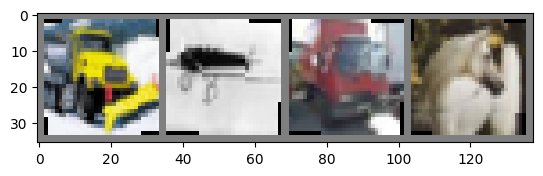

truck plane truck horse


In [5]:
# Creating a method to visualize the data images with matplotlib
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#Creating a Convolutional Neural Network:
- My first version without convolutional only had a 15% accuracy
- Convolutional should be able to score much higher accuracy

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class CIFARModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Creating convolutional and linear layers
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [7]:
model_1 = CIFARModelV1()

Defining a loss function and optimizer

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

#Training and Testing

In [9]:
# Training the neural network
for epoch in range(10):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%2000 == 1999:
      print(f'[{epoch +1}, {i+1:5d}] loss: {running_loss/2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.226
[1,  4000] loss: 1.920
[1,  6000] loss: 1.706
[1,  8000] loss: 1.611
[1, 10000] loss: 1.553
[1, 12000] loss: 1.511
[2,  2000] loss: 1.440
[2,  4000] loss: 1.411
[2,  6000] loss: 1.407
[2,  8000] loss: 1.339
[2, 10000] loss: 1.342
[2, 12000] loss: 1.343
[3,  2000] loss: 1.285
[3,  4000] loss: 1.275
[3,  6000] loss: 1.258
[3,  8000] loss: 1.252
[3, 10000] loss: 1.240
[3, 12000] loss: 1.250
[4,  2000] loss: 1.186
[4,  4000] loss: 1.189
[4,  6000] loss: 1.201
[4,  8000] loss: 1.191
[4, 10000] loss: 1.189
[4, 12000] loss: 1.167
[5,  2000] loss: 1.142
[5,  4000] loss: 1.143
[5,  6000] loss: 1.164
[5,  8000] loss: 1.123
[5, 10000] loss: 1.146
[5, 12000] loss: 1.142
[6,  2000] loss: 1.109
[6,  4000] loss: 1.089
[6,  6000] loss: 1.097
[6,  8000] loss: 1.116
[6, 10000] loss: 1.111
[6, 12000] loss: 1.091
[7,  2000] loss: 1.079
[7,  4000] loss: 1.065
[7,  6000] loss: 1.079
[7,  8000] loss: 1.076
[7, 10000] loss: 1.065
[7, 12000] loss: 1.066
[8,  2000] loss: 1.026
[8,  4000] 

In [10]:
# Saving the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

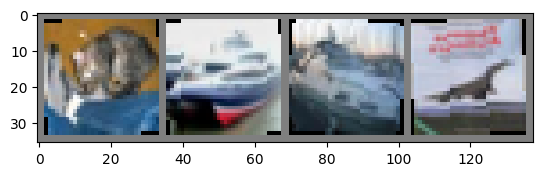

GroundTruth:  cat   ship  ship  plane


In [11]:
dataiter = iter(testloader)
images,labels = next(dataiter)

# Printing images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [12]:
# Loading the saved model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
outputs = net(images)

In [14]:
# To see how the network performs on the whole dataset
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print (f'Accuracy of the network on the 10000 test images: {100*correct // total}%')

Accuracy of the network on the 10000 test images: 61%


In [15]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs in net(images)
    _, predictions = torch.max(outputs, 1)
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100*float(correct_count) / total_pred [classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 24.3 %
Accuracy for class: deer  is 25.7 %
Accuracy for class: dog   is 25.6 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 25.6 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %


#To test sending the device to the GPU:

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print (device)

cpu


In [17]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [18]:
inputs,labels = data[0].to(device), data[1].to(device)